![CC-BY-SA](https://mirrors.creativecommons.org/presskit/buttons/88x31/svg/by-sa.svg)


This notebook was created by [Bernardo Freitas Paulo da Costa](http://www.im.ufrj.br/bernardofpc),
and is licensed under Creative Commons BY-SA.

Antes de enviar este Teste, verifique que tudo está funcionando como esperado.
Por exemplo, **rode o código inteiro, do zero**.
Para isso, vá no menu, escolha _Kernel_, depois _Restart & Run All_.

Verifique, também, que você respondeu todas as questões:
* as questões de código têm `YOUR CODE HERE` (e você pode apagar o `raise NotImplemented` ao incluir sua resposta)
* as questões discursivas têm "YOUR ANSWER HERE".

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Teste 5: Erros parciais e erros totais

# Parte 1: Método do retângulo

Para calcular uma aproximação para uma integral,
o método do retângulo divide o intervalo de integração em $N$ intervalos $I_i = [x_i,x_{i+1}]$,
com $i=0,\ldots,N-1$.
O erro parcial no intervalo $I_i$ é definido como a diferença entre a aproximação do método do retângulo
e a integral exata neste intervalo.

## Questão 1: Todos os termos do método do retângulo

Para estudarmos as propriedades dos erros parciais,
implemente a função `rect_parcs(f, a, b, N)`,
que integra a função `f` de `a` até `b` pelo método do retângulo,
utilizando `N` intervalos,
que retorna:
- uma lista (ou `np.array`) com os pontos iniciais dos intervalos utilizados; e
- uma lista (ou `np.array`) com a aproximação da integral em cada intervalo.

In [2]:
def rect_parcs(f, a, b, N):
    l = np.linspace(a, b, num=N, endpoint=False)
    h = (b-a)/N
    int_l = f(l)*h
    return l, int_l

In [3]:
def f(x): return 2*x
xs, parcs = rect_parcs(f,0,1, 100)

assert len(xs) == len(parcs) == 100
assert np.isclose(np.sum(parcs),1,atol=1e-2)

In [4]:
def f(x): return 2*x
xs, parcs = rect_parcs(f,0,1, 10000)

assert len(xs) == len(parcs) == 10000
assert np.isclose(np.sum(parcs),1,atol=1e-4)

In [5]:
def f(x): return 2*x
xs, parcs = rect_parcs(f,0,1, 100)

assert xs[-1]+xs[1]-xs[0] == 1

## Questão 2: Testando com o seno

Vamos trabalhar com a função $\sin(x)$.
Para comparar com a integral exata,
você vai precisar de uma função `int_sin(a,b)` que calcule o valor exato de $\int\limits_{a}^{b}\sin(x)dx$.

In [6]:
def int_sin(a,b):
    return np.cos(a) - np.cos(b)

In [7]:
assert int_sin(1,2) == -int_sin(2,1)
assert int_sin(3,3) == 0
assert np.isclose(int_sin(-np.pi/2,0),-1)

Calcule a integral de $\sin(x)$ de $0$ até $\pi$, usando 15 divisões pelo método do retângulo,
e faça um gráfico mostrando o erro parcial em cada intervalo em função do ponto inicial de cada intervalo.

In [8]:
xk = rect_parcs(lambda x: np.sin(x), 0, np.pi, 15)[0]
int_retangulo = rect_parcs(lambda x: np.sin(x), 0, np.pi, 15)[1]


a = []
for i in range(15):
    if i <= 13:
        a.append(int_sin(xk[i],xk[i+1]))
    if i == 14:
        a.append(int_sin(xk[i],np.pi))


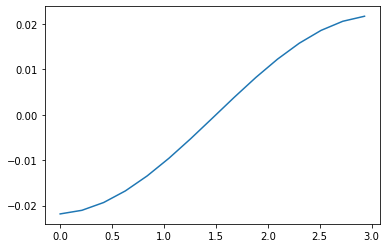

In [9]:
xk = rect_parcs(lambda x: np.sin(x), 0, np.pi, 15)[0]
int_retangulo = rect_parcs(lambda x: np.sin(x), 0, np.pi, 15)[1]

int_analitica = []
for i in range(15):
    if i <= 13:
        int_analitica.append(int_sin(xk[i],xk[i+1]))
    if i == 14:
        int_analitica.append(int_sin(xk[i],np.pi))

erro = int_retangulo - int_analitica
plt.plot(xk, erro);

Explique o gráfico acima. O formato deste gráfico te lembra alguma coisa?

O comportamento do gráfico acima lembra o do -cos(x) (integral da função utilizada no problema), porém com uma escala no eixo y reduzida. Podemos observar que o pto de máxima e mínima que deveriam ser respectivamente 1 e -1 estão agora próximos de 0.2 e -0.2, mostrando uma possível realação com o tamanho de h (consequentemente com N).

## Questão 3: Variando `N`

Repita o experimento acima para `N` $=10,100$ e $1000$, fazendo três gráficos lado a lado.

Sugestão: escreva uma função `errs_rect(f, a, b, N, int_f)`
que calcula os erros de integração de $f$,
dado o intervalo $[a,b]$, o número de subdivisões $N$
e uma função `int_f` que retorna a integral analítica (como `int_sin`).

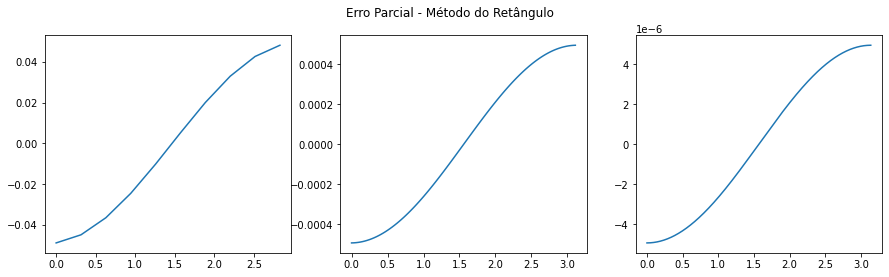

In [10]:
fig, axs = plt.subplots(ncols=3, figsize=(15,4), sharey=False)
num_divs = [10,100,1000]

def errs_rect(f, a, b, N, int_f):
    l = np.linspace(a, b, num=N, endpoint=False)
    h = (b-a)/N
    int_l = f(l)*h
    
    int_analitica = []
    for i in range(N):
        if i <= N-2:
            int_analitica.append(int_f(l[i],l[i+1]))
        if i == N-1:
            int_analitica.append(int_f(l[i],b))

    erro = int_l - int_analitica
    return erro   

plt.subplot(1, 3, 1)
x1 = np.linspace(0, np.pi, num=10, endpoint=False)
y1 = errs_rect(lambda x: np.sin(x), 0, np.pi, 10, int_sin)
plt.plot(x1,y1)

plt.subplot(1, 3, 2)
x2 = np.linspace(0, np.pi, num=100, endpoint=False)
y2 = errs_rect(lambda x: np.sin(x), 0, np.pi, 100, int_sin)
plt.plot(x2,y2)

plt.subplot(1, 3, 3)
x3 = np.linspace(0, np.pi, num=1000, endpoint=False)
y3 = errs_rect(lambda x: np.sin(x), 0, np.pi, 1000, int_sin)
plt.plot(x3,y3)

plt.suptitle("Erro Parcial - Método do Retângulo");

Comente. Como os erros parciais variam em função do número de divisões do intervalo?

Conforme o número de intervalos aumenta, o erro diminui de forma inversamente proporcional e ao quadrado (se o número de intervalos é multiplicado por 2, então o erro será divido por 4). Nos exemplos acima o número de intervalos está, a cada gráfico sendo multiplicado por 10, logo, podemos ver a cada gráfico o erro sendo dividido por 100.

Vamos definir o $i$-ésimo erro total como a soma dos erros parciais dos intervalos $I_1$, $I_2$, até $I_i$.

Faça mais um gráfico triplo, para os mesmos valores de `N`,
desta vez mostrando o $i$-ésimo erro total em função do final do $i$-ésimo intervalo.

Dica: `np.cumsum`

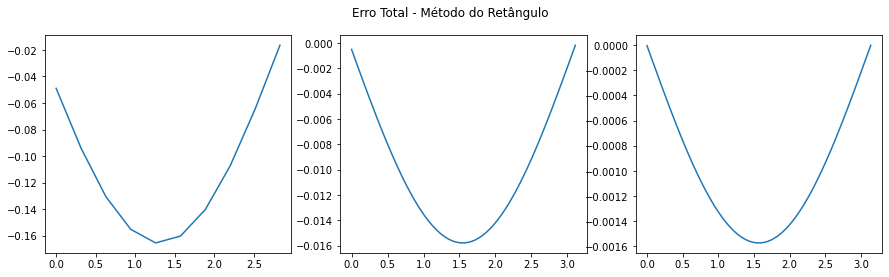

In [11]:
fig, axs = plt.subplots(ncols=3, figsize=(15,4), sharey=False)
num_divs = [10,100,1000]

def errs_rect(f, a, b, N, int_f):
    l = np.linspace(a, b, num=N, endpoint=False)
    h = (b-a)/N
    int_l = f(l)*h
    
    int_analitica = []
    for i in range(N):
        if i <= N-2:
            int_analitica.append(int_f(l[i],l[i+1]))
        if i == N-1:
            int_analitica.append(int_f(l[i],b))
       
    erro = [int_l[i] - int_analitica[i] for i in range(N)]
    soma_erro = [np.sum(erro[0:i+1]) for i in range(len(erro))]
    return soma_erro

plt.subplot(1, 3, 1)
x1 = np.linspace(0, np.pi, num=10, endpoint=False)
y1 = errs_rect(lambda x: np.sin(x), 0, np.pi, 10, int_sin)
plt.plot(x1,y1)

plt.subplot(1, 3, 2)
x2 = np.linspace(0, np.pi, num=100, endpoint=False)
y2 = errs_rect(lambda x: np.sin(x), 0, np.pi, 100, int_sin)
plt.plot(x2,y2)

plt.subplot(1, 3, 3)
x3 = np.linspace(0, np.pi, num=1000, endpoint=False)
y3 = errs_rect(lambda x: np.sin(x), 0, np.pi, 1000, int_sin)
plt.plot(x3,y3)

plt.suptitle("Erro Total - Método do Retângulo");

O formato destes gráficos te lembra alguma coisa?

Sim, a função -sen(x) no intervalo observado [0, pi]

Os erros totais diminuem ou aumentam quando o número de divisões do intervalo aumenta? Na mesma proporção que os erros parciais? Porquê?

Os erros totais diminuem, porém não na mesma proporção que os erros parciais (agora decresce na mesma proporção com que h cresce), isso se dá pois, quando a derivada da função é positiva obtêm-se uma aproximação por baixo, com isso a diferença entre a aproximação e a integral analítica (valor maior que o da aproximação) resultará em um valor negativo, por outro lado, quando a derivada é negativa obtêm-se uma aproximação por cima, e logo a diferença agora será positiva, vale comentar também que quando a derivada é 0, a diferença naquele ponto também será será 0. 

Olhando para o erro total, percebemos que o erro começa decrescendo, o que é esperado pois estamos somando valores negativos (derivada de f positiva), porém vai ficando cada vez menos intenso (derivada se aproximando de 0), até que para e começa a crescer (derivada negativa), conforme sua derivada fica cada vez mais negativa, vai sendo acrescentado à soma dos erros valores cada vez maiores (positivos), gerando com isso o gráfico com comportamento similar ao de -sen(x).

# Parte 2: Método do trapézio

Vamos repetir a análise para o método do trapézio.

## Questão 4: Termos do trapézio

Primeiro, defina a função `trap_parcs(f, a, b, N)`, nos mesmos moldes de antes.

In [12]:
def trap_parcs(f, a, b, N):
    l = np.linspace(a, b, num=N, endpoint=False)
    h = (b-a)/N
    int_l = []
    
    for i in range(len(l)):
        if i <= len(l)-2:
            new_a = ((f(l[i]) + f(l[i+1])) /2) * h
            int_l.append(new_a)
        if i == len(l)-1:
            new_a = ((f(l[i]) + f(b)) /2) * h
            int_l.append(new_a)

    return l, int_l

In [13]:
def f(x): return x**2
xs, parcs = trap_parcs(f,0,1, 100)

assert len(xs) == len(parcs) == 100
assert np.isclose(np.sum(parcs), 1/3, atol=1e-4)

## Questão 5: Gráficos

Faça o gráficos dos erros parciais para o seno, variando o número de divisões do intervalo de integração.

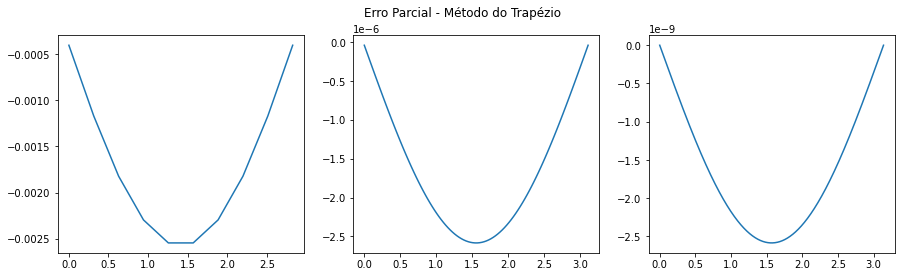

In [14]:
fig, axs = plt.subplots(ncols=3, figsize=(15,4), sharey=False)
num_divs = [10,100,1000]

def trap_parcs_erro(f, a, b, N, int_f):
    l = np.linspace(a, b, num=N, endpoint=False)
    h = (b-a)/N
    
    int_l = []
    for i in range(len(l)):
        if i <= len(l)-2:
            new_a = ((f(l[i]) + f(l[i+1])) /2) * h
            int_l.append(new_a)
        if i == len(l)-1:
            new_a = ((f(l[i]) + f(b)) /2) * h
            int_l.append(new_a)
    
    int_analitica = []
    for i in range(N):
        if i <= N-2:
            int_analitica.append(int_f(l[i],l[i+1]))
        if i == N-1:
            int_analitica.append(int_f(l[i],b))
    
    erro = [int_l[i] - int_analitica[i] for i in range(N)]
    return erro

plt.subplot(1, 3, 1)
x1 = np.linspace(0, np.pi, num=10, endpoint=False)
y1 = trap_parcs_erro(lambda x: np.sin(x), 0, np.pi, 10, int_sin)
plt.plot(x1,y1)

plt.subplot(1, 3, 2)
x2 = np.linspace(0, np.pi, num=100, endpoint=False)
y2 = trap_parcs_erro(lambda x: np.sin(x), 0, np.pi, 100, int_sin)
plt.plot(x2,y2)

plt.subplot(1, 3, 3)
x3 = np.linspace(0, np.pi, num=1000, endpoint=False)
y3 = trap_parcs_erro(lambda x: np.sin(x), 0, np.pi, 1000, int_sin)
plt.plot(x3,y3)

plt.suptitle("Erro Parcial - Método do Trapézio");

Comente. O que mudou dessa vez?

O erro agora diminui na ordem de h ao cubo e não na ordem de h ao quadrado como no método do retângulo e, o gráfico do erro se comporta de forma semelhante ao do gráfico do ERRO TOTAL do método do retângulo, cujo comportamento se assemelhava ao de -sen(x).

Agora faça o gráficos dos erros totais variando o número de divisões do intervalo de integração.

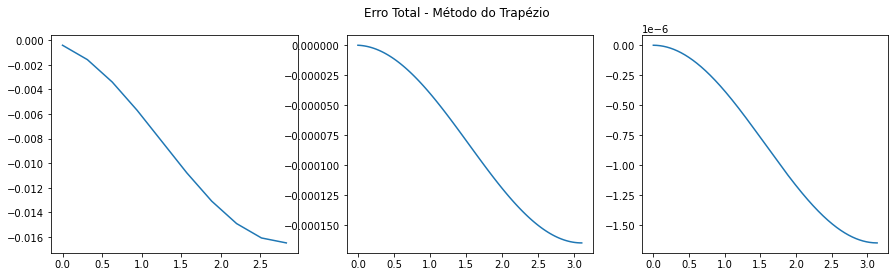

In [15]:
fig, axs = plt.subplots(ncols=3, figsize=(15,4), sharey=False)
num_divs = [10,100,1000]

def trap_parcs_erro_soma(f, a, b, N, int_f):
    l = np.linspace(a, b, num=N, endpoint=False)
    h = (b-a)/N
    
    int_l = []
    for i in range(len(l)):
        if i <= len(l)-2:
            new_a = ((f(l[i]) + f(l[i+1])) /2) * h
            int_l.append(new_a)
        if i == len(l)-1:
            new_a = ((f(l[i]) + f(b)) /2) * h
            int_l.append(new_a)
    
    int_analitica = []
    for i in range(N):
        if i <= N-2:
            int_analitica.append(int_f(l[i],l[i+1]))
        if i == N-1:
            int_analitica.append(int_f(l[i],b))
    
    erro = [int_l[i] - int_analitica[i] for i in range(N)]
    soma_erro = [np.sum(erro[0:i+1]) for i in range(len(erro))]
    return soma_erro

plt.subplot(1, 3, 1)
x1 = np.linspace(0, np.pi, num=10, endpoint=False)
y1 = trap_parcs_erro_soma(lambda x: np.sin(x), 0, np.pi, 10, int_sin)
plt.plot(x1,y1)

plt.subplot(1, 3, 2)
x2 = np.linspace(0, np.pi, num=100, endpoint=False)
y2 = trap_parcs_erro_soma(lambda x: np.sin(x), 0, np.pi, 100, int_sin)
plt.plot(x2,y2)

plt.subplot(1, 3, 3)
x3 = np.linspace(0, np.pi, num=1000, endpoint=False)
y3 = trap_parcs_erro_soma(lambda x: np.sin(x), 0, np.pi, 1000, int_sin)
plt.plot(x3,y3)

plt.suptitle("Erro Total - Método do Trapézio");

Comente o gráfico, relacionando com os gráficos vistos anteriormente.

Novamente, podemos observar que o erro diminui ao quadrado ao passo que N aumenta em 1 ordem, vemos também que o comportamento do gráfico é semelhante ao do ERRO PARCIAL do método do retângulo (que se assemelha com -cos(x)), porém invertido em relação ao eixo x (sinal trocado), logo, o gráfico acima tem comportamento similar ao de cos(x), o que é esperado, pois como visto nas aulas, o termo dominante que se espera do erro no método do trapézio seria algo na ordem de h ao quadrado, vezes a integral definida no intervalo [a,b] da segunda derivada de f (o que nos dá esse comportamento de cos(x) nos gráficos acima).

Extra: É evidente que existe uma relação entre os métodos do retângulo e do trapézio e, fica gritante a semelhança dos gráficos do ERRO TOTAL do método do retângulo e do ERRO PARCIAL do método do trapézio, pode-se perceber que, nos gráficos agora citados, mesmo com a semelhança do comportamento das funções e utilizando o mesmo número de intervalos, o método do trapézio obtêm um erro menor, e ainda (como dito antes), ao passo que N aumenta em 1 ordem, no método do trapézio, o erro decresce bem mais rápido (ordem 3), enquanto que no método do retângulo, o erro decresce mais lentamente (ordem 2).

## Questão 6: Retângulo e Trapézio

Vamos "transpor" os gráficos:
Para cada ponto $x_i = \pi/4$, $\pi/3$ e $\pi/2$,
faça um gráfico do erro de integração no intervalo $[x_i, x_i + h]$ em função de $h$,
variando de $\pi/10$ a $\pi/1000$.

Faça 2 curvas em cada gráfico: uma para o método do retângulo, e outra para o do trapézio.
Não esqueça de incluir títulos e legendas!

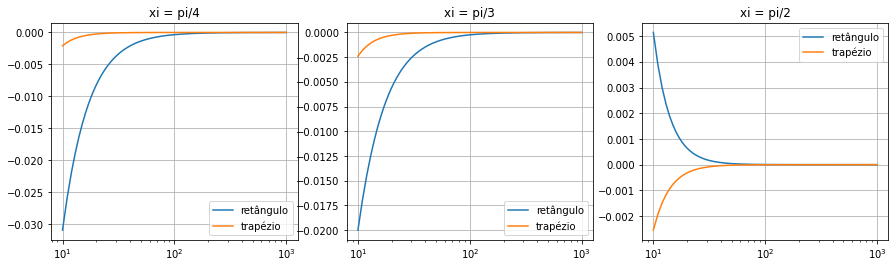

In [16]:
fig, axs = plt.subplots(ncols=3, figsize=(15,4))
xs = np.pi * np.array([1/4, 1/3, 1/2])
h_var = [np.pi/i for i in range(10,1001)]

plt.subplot(1, 3, 1)
x1 = range(10,1001)
y1_ret = [errs_rect(lambda x: np.sin(x), xs[0], xs[0]+i, 1, int_sin) for i in h_var]
y1_trap = [trap_parcs_erro(lambda x: np.sin(x), xs[0], xs[0]+i, 1, int_sin) for i in h_var]
plt.semilogx(x1,y1_ret, label='retângulo')
plt.semilogx(x1,y1_trap, label='trapézio')
plt.legend()
plt.title('xi = pi/4')
plt.grid()

plt.subplot(1, 3, 2)
x2 = range(10,1001)
y2_ret = [errs_rect(lambda x: np.sin(x), xs[1], xs[1]+i, 1, int_sin) for i in h_var]
y2_trap = [trap_parcs_erro(lambda x: np.sin(x), xs[1], xs[1]+i, 1, int_sin) for i in h_var]
plt.semilogx(x2,y2_ret, label='retângulo')
plt.semilogx(x2,y2_trap, label='trapézio')
plt.legend()
plt.title('xi = pi/3')
plt.grid()

plt.subplot(1, 3, 3)
x3 = range(10,1001)
y3_ret = [errs_rect(lambda x: np.sin(x), xs[2], xs[2]+i, 1, int_sin) for i in h_var]
y3_trap = [trap_parcs_erro(lambda x: np.sin(x), xs[2], xs[2]+i, 1, int_sin) for i in h_var]
plt.semilogx(x3,y3_ret, label='retângulo')
plt.semilogx(x3,y3_trap, label='trapézio')
plt.legend()
plt.title('xi = pi/2')
plt.grid();

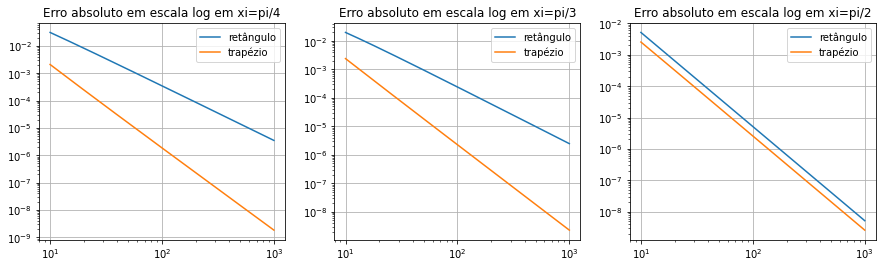

In [17]:
fig, axs = plt.subplots(ncols=3, figsize=(15,4))
xs = np.pi * np.array([1/4, 1/3, 1/2])
h_var = [np.pi/i for i in range(10,1001)]

plt.subplot(1, 3, 1)
x1 = range(10,1001)
y1_ret = [errs_rect(lambda x: np.sin(x), xs[0], xs[0]+i, 1, int_sin) for i in h_var]
y1_ret_abs = [abs(i[0]) for i in y1_ret]
y1_trap = [trap_parcs_erro(lambda x: np.sin(x), xs[0], xs[0]+i, 1, int_sin) for i in h_var]
y1_trap_abs = [abs(i[0]) for i in y1_trap]
plt.loglog(x1,y1_ret_abs, label='retângulo')
plt.loglog(x1,y1_trap_abs, label='trapézio')
plt.legend()
plt.title('Erro absoluto em escala log em xi=pi/4')
plt.grid()

plt.subplot(1, 3, 2)
x2 = range(10,1001)
y2_ret = [errs_rect(lambda x: np.sin(x), xs[1], xs[1]+i, 1, int_sin) for i in h_var]
y2_ret_abs = [abs(i[0]) for i in y2_ret]
y2_trap = [trap_parcs_erro(lambda x: np.sin(x), xs[1], xs[1]+i, 1, int_sin) for i in h_var]
y2_trap_abs = [abs(i[0]) for i in y2_trap]
plt.loglog(x2,y2_ret_abs, label='retângulo')
plt.loglog(x2,y2_trap_abs, label='trapézio')
plt.legend()
plt.title('Erro absoluto em escala log em xi=pi/3')
plt.grid()

plt.subplot(1, 3, 3)
x3 = range(10,1001)
y3_ret = [errs_rect(lambda x: np.sin(x), xs[2], xs[2]+i, 1, int_sin) for i in h_var]
y3_trap = [trap_parcs_erro(lambda x: np.sin(x), xs[2], xs[2]+i, 1, int_sin) for i in h_var]
y3_trap_abs = [abs(i[0]) for i in y3_trap]
plt.loglog(x3,y3_ret, label='retângulo')
plt.loglog(x3,y3_trap_abs, label='trapézio')
plt.legend()
plt.title('Erro absoluto em escala log em xi=pi/2')
plt.grid();

O que você observa nestes gráficos?

Podemos confirmar que o método do trapézio é mais preciso, já se iniciando com erro menor e, convergindo de forma mais rápida para 0 ao passo que h diminui (pode-se confirmar melhor isso olhando os gráficos do erro ABSOLUTO em escala log), também é possível observar que, em xi=pi/2 (3º gráfico) a velocidade de convergência de ambos se mostra igual.